In [1]:
from wtlike import *
from utilities.ipynb_docgen import *
from utilities.catalogs import *
from pathlib import Path
plt.rc('font', size=14)

In [2]:
%run code/lcr.py
name='PKS 0208-512'
lcr = LCR(name, key='')

Loaded Fermi 4FGL-DR3 gll_psc_v28.fit: 6659 entries


IndexError: list index out of range

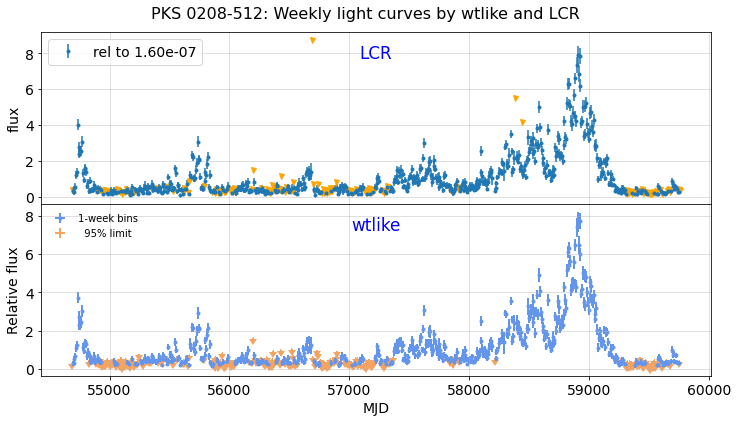

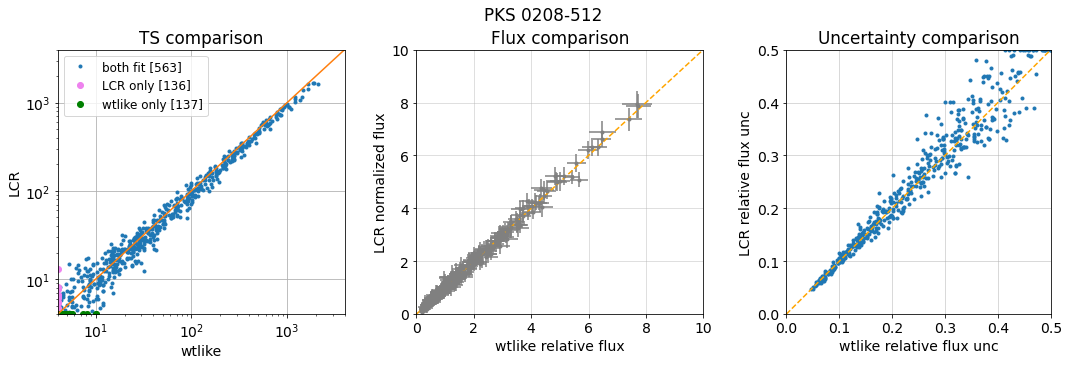

In [55]:
lcr.plot()
lcr.compare_all(title=name);

In [36]:
self = lcr
fx_cut = np.percentile(self.wtl_df.flux, 90)
df = self.df
subset = df[df.flux>fx_cut]
lcrfx = subset.lcr_flux
wtlfx = subset.flux
r = lcrfx/wtlfx
r.mean(), r.std()


(0.5596046983802845, 0.02785559742142858)

In [16]:
s = lcr.wtl.source
s.fit_info

{'errs': array([0.00338425, 0.00794818]),
 'modelname': 'LogParabola',
 'pars': array([6.06523681e-11, 2.21462021e+00, 9.21719393e-02, 5.25957124e+02]),
 'ts': 58225.7}

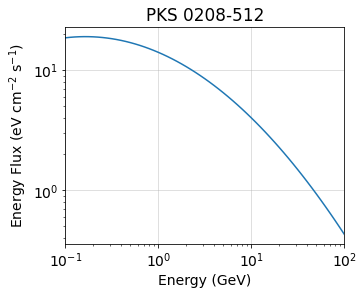

In [18]:
s.sed_plot() #spectral_model

In [45]:
lcr3 = LCR('3C 273', '4FGL_J1229.0+0202_weekly_7_14_2022.csv')

Loaded Fermi 4FGL-DR3 gll_psc_v28.fit: 6659 entries
Read LCR light curve file 4FGL_J1229.0+0202_weekly_7_14_2022.csv with 725 entries to Jul 08 2022.
SourceData:  4FGL J1229.0+0202: Restoring from cache with key "P88Y3157_data"
SourceData: Source 3C 273 with:
	 data:       101,537 photons from 2008-08-04 to 2022-07-02
	 exposure: 3,069,484 intervals,  average effective area 2739 cm^2 for 91.7 Ms
	 rates:  source 1.24e-07/s, background 2.81e-07/s,
CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 713 cells for fitting with e>35 & n>2
Set normalization for LCR fits: 2.53e-07
Compare 725 week fits for TS>4 measurements
	Both missing       83
	LCR, no wtlike     64
	wtlike, no LCR      6


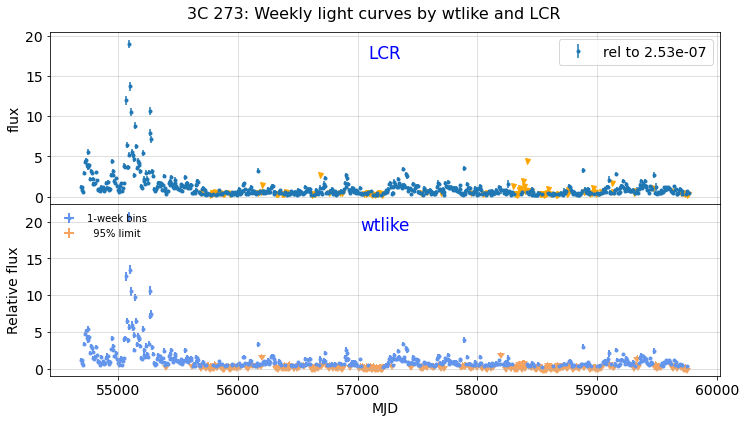

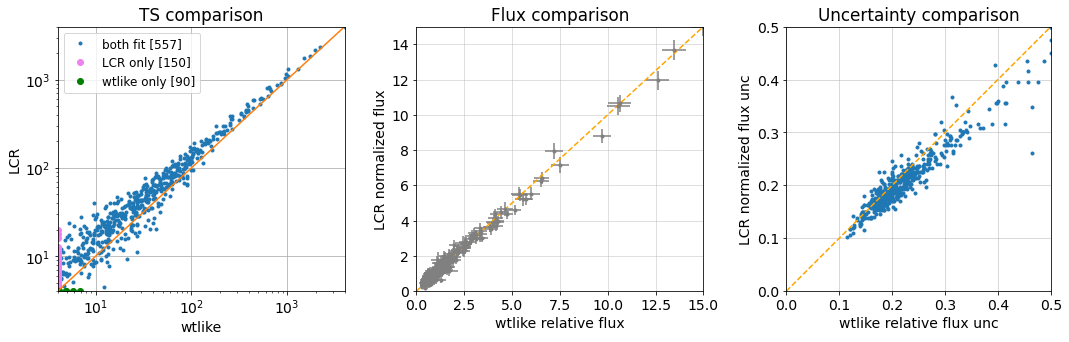

In [47]:
lcr3.plot()
lcr3.compare_all(fmax=15);

Reference: [LIght Curve Repository](https://fermi.gsfc.nasa.gov/ssc/data/access/lat/LightCurveRepository) (LCR)

In [56]:
lcr4 = LCR('4FGL J0231.2-4745')

Read LCR light curve file 4FGL_J0231.2-4745_weekly_7_14_2022.csv with 723 entries to Jul 08 2022.
SourceData:  4FGL J0231.2-4745: Restoring from cache with key "P88Y0615_data"
SourceData: Source 4FGL J0231.2-4745 with:
	 data:        96,368 photons from 2008-08-04 to 2022-07-02
	 exposure: 3,281,545 intervals,  average effective area 3459 cm^2 for 98.0 Ms
	 rates:  source 1.38e-08/s, background 2.70e-07/s, TS 1907.3
CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 717 cells for fitting with e>35 & n>2
Set normalization for LCR fits: 2.46e-08
Compare 723 week fits for TS>4 measurements
	Both missing      513
	LCR, no wtlike     37
	wtlike, no LCR     26


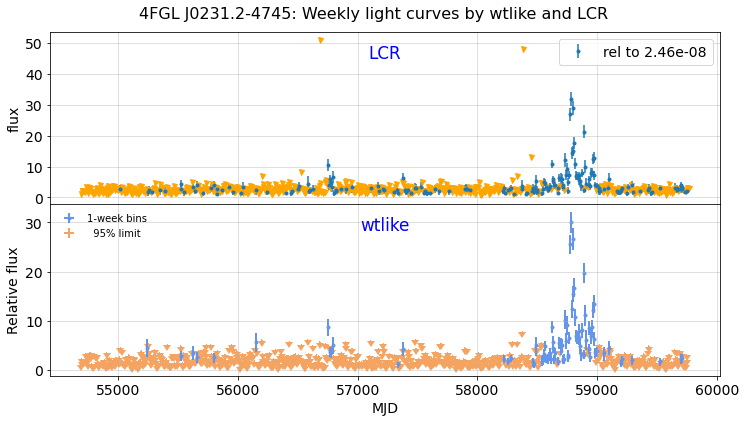

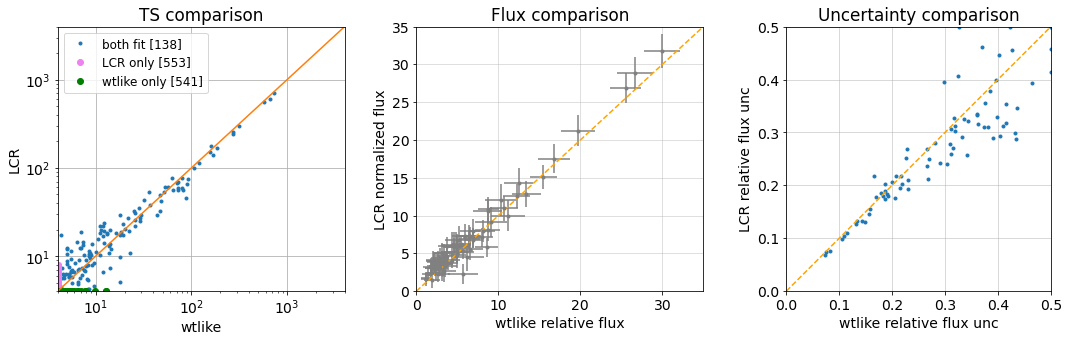

In [57]:
lcr4.plot()
lcr4.compare_all( fmax=35);

In [281]:
udf = self.lcr_df.query('flux>6e-7 & flux_unc>0'); 
udf.index = udf.t.round(1); udf

,t,flux,flux_unc,ts,Gamma
t,,,,,
58774.5,58774.500754,6.600000e-07,4.900000e-08,606.30,-2.76
58781.5,58781.500754,7.810000e-07,5.400000e-08,704.08,-2.76
58802.5,58802.500754,7.090000e-07,5.400000e-08,558.07,-2.76


In [282]:
@ipynb_doc
def inline(text):
    """{text}"""
    return locals()
@ipynb_doc
def run( func, *pars, **kwargs):
    """{fig}"""
    fig = func(*pars, **kwargs)
    return locals()

### PKS 0208-512


<figure style="margin-left: 5%" title="Figure 1">   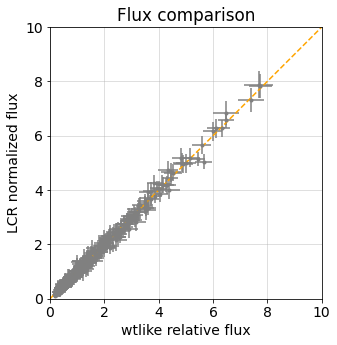 </figure>


### 3C 273


<figure style="margin-left: 5%" title="Figure 2">   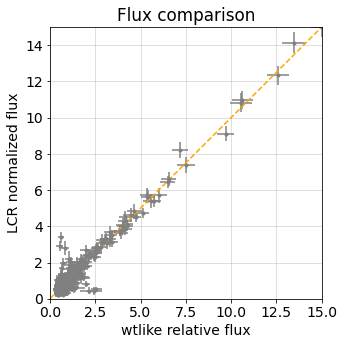 </figure>


In [283]:
inline(f'### {lcr.name}')
run(lcr.flux_comparison,fmax=10, fignum=1)
inline(f'### {lcr3.name}')
run(lcr3.flux_comparison,fmax=15, fignum=2)

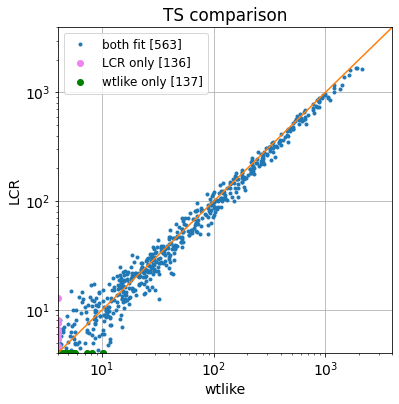

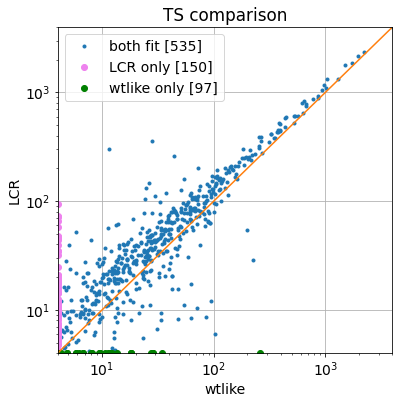

In [284]:
lcr.ts_comparison(fignum=3);
lcr3.ts_comparison(fignum=4);

In [2]:
# hide
@ipynb_doc
def compare(name='3C 273', 
                  file='4FGL_J1229.0+0202_weekly_8_23_2021.csv'):
    """
    ## wtlike/LCR {name} comparison.

    {out1}
    
    The two light curves:
    {fig1}
    
    They are very similar, look at correlation of flux and uncertainty measurements:
    {fig2}
    
    The LCR measurement is absolute, while wtlike uses the pointlike spectral fit as a reference, 
    producing a relative flux measurement. For comparison, I normalize the LCR with a factor {norm:.2e}.
    <br><p>
    Now look at the two ratios vs. energy:
    {fig3}
    Clearly they change systematically with energy.
    
    <!---
    <br><br>    
    Finally, since the LCR fits have the photon index free, look at its correlation with flux:
    {fig4}
    Evidently, the LCR fits are significantly softer at low energies. Is this effect science, reflecting
    the flare mechanism, or a systematic of the fit? It would be useful to have the correlation coefficient
    from the fits. Another concern would  be a diffuse systematic. I am very skeptical about how soft 
    some of those fits are--the photon index above 3 is quite problematic if the diffuse is important.
    -->
    """
    global y
    with capture_hide('Setup output') as out1:
        y = LCR(name, file) 
    norm = y.lcr_man
    
    fig1 = figure(y.plot(fignum=1))
    fig2 = figure(y.flux_comparison())
    fig3 = figure(y.ratio_comparison())
    fig4 = figure(y.lcr_index())
    
    return locals()

## wtlike/LCR PKS 0208-512 comparison.

<details  class="nbdoc-description" >  <summary> Setup output </summary>  <div style="margin-left: 5%;"><pre>SourceData:  PKS 0208-512: Restoring from cache with key "P88Y0521_data"<br>SourceData: Source PKS 0208-512 with:<br>	 data:       117,312 photons from 2008-08-04 to 2022-07-02<br>	 exposure: 3,327,323 intervals,  average effective area 3472 cm^2 for 99.4 Ms<br>	 rates:  source 1.06e-07/s, background 2.34e-07/s, TS 58225.7<br>CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0<br>LightCurve: select 717 cells for fitting with e&gt;35 & n&gt;2<br>Compare 721 week fits for TS&gt;9 measurements<br>	Both missing        0<br>	LCR, no wtlike    105<br>	wtlike, no LCR      0<br></pre></div> </details>

The two light curves:
<figure style="margin-left: 5%" title="Figure 1">   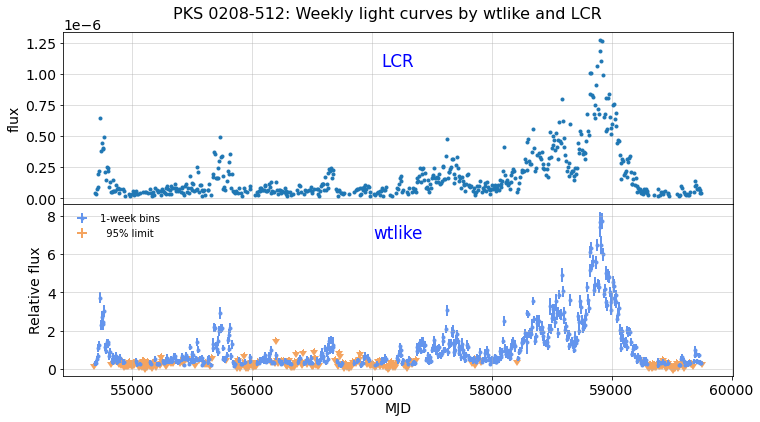 </figure>

They are very similar, look at correlation of flux and uncertainty measurements:
<figure style="margin-left: 5%" title="Figure 2">   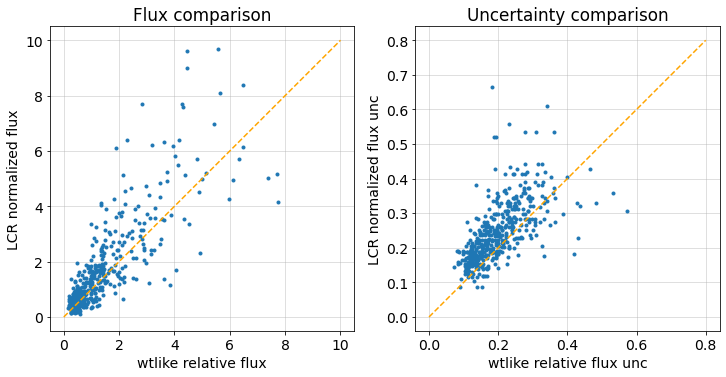 </figure>

The LCR measurement is absolute, while wtlike uses the pointlike spectral fit as a reference, 
producing a relative flux measurement. For comparison, I normalize the LCR with a factor 1.31e-07.
<br><p>
Now look at the two ratios vs. energy:
<figure style="margin-left: 5%" title="Figure 3">   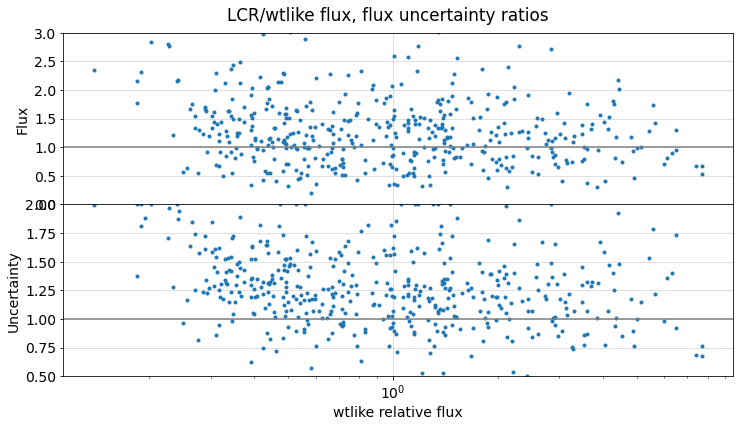 </figure>
Clearly they change systematically with energy.

<!---
<br><br>    
Finally, since the LCR fits have the photon index free, look at its correlation with flux:
<figure style="margin-left: 5%" title="Figure 4">   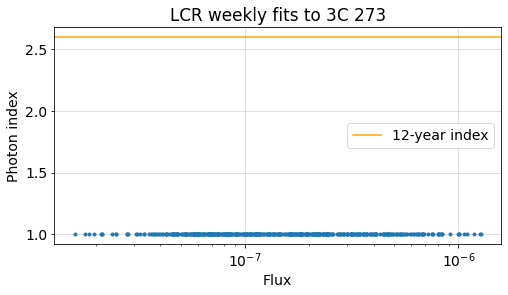 </figure>
Evidently, the LCR fits are significantly softer at low energies. Is this effect science, reflecting
the flare mechanism, or a systematic of the fit? It would be useful to have the correlation coefficient
from the fits. Another concern would  be a diffuse systematic. I am very skeptical about how soft 
some of those fits are--the photon index above 3 is quite problematic if the diffuse is important.
-->


In [6]:
compare(name, filename)